### Problem Statement:
##### Classifying the msrp of car prices

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Acquisition


In [22]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [23]:
df = pd.read_csv(url)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

##### Features
##### For the rest of the homework, you'll need to use only these columns:

##### (Make,  Model,Year,Engine HP, Engine Cylinders, Transmission Type, Vehicle Style, highway MPG, city mpg,MSRP)

##### Select only the features from above and transform their names using the next line:
##### Fill in the missing values of the selected features with 0.
##### Rename MSRP variable to price.

### Data Preparation

In [25]:
df = df[['Make','Model','Year','Engine HP', 
              'Engine Cylinders', 'Transmission Type', 
              'Vehicle Style', 'highway MPG', 'city mpg','MSRP']]

In [26]:
df

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920


In [27]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [31]:
df.rename(columns = {'msrp': 'price'}, inplace = True)
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

### Question 1
##### What is the most frequent observation (mode) for the column transmission_type?

##### AUTOMATIC
##### MANUAL
#### AUTOMATED_MANUAL
#### DIRECT_DRIVE

In [32]:
df.transmission_type[df.transmission_type.value_counts().max()]

'AUTOMATIC'

### Question 2
###### Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

###### What are the two features that have the biggest correlation in this dataset?

###### engine_hp and year
###### engine_hp and engine_cylinders
###### highway_mpg and engine_cylinders
###### highway_mpg and city_mpg



In [33]:
#specify the numeric columns
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [34]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [35]:
numeric = ['year', 'engine_hp','engine_cylinders','highway_mpg', 'city_mpg']

In [36]:
df[numeric]

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
0,2011,335.0,6.0,26,19
1,2011,300.0,6.0,28,19
2,2011,300.0,6.0,28,20
3,2011,230.0,6.0,28,18
4,2011,230.0,6.0,28,18
...,...,...,...,...,...
11909,2012,300.0,6.0,23,16
11910,2012,300.0,6.0,23,16
11911,2012,300.0,6.0,23,16
11912,2013,300.0,6.0,23,16


In [37]:
corr_matrix = df[numeric].corr()

In [38]:
corr_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg
year,1.000000,0.351794,-0.041479,0.258240,0.198171
engine_hp,0.351794,1.000000,0.779988,-0.406563,-0.439371
engine_cylinders,-0.041479,0.779988,1.000000,-0.621606,-0.600776
highway_mpg,0.258240,-0.406563,-0.621606,1.000000,0.886829
city_mpg,0.198171,-0.439371,-0.600776,0.886829,1.000000


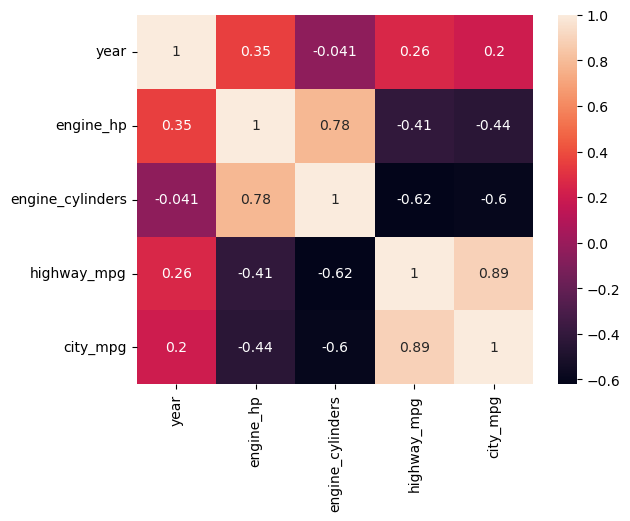

In [39]:
sns.heatmap(corr_matrix, annot=True)
plt.show()

### Make price binary
###### Now we need to turn the price variable from numeric into a binary format.
###### Let's create a variable above_average which is 1 if the price is above its mean value and 0 otherwise.

In [42]:
df.price.value_counts()

2000     1036
29995      19
25995      19
20995      16
27995      16
         ... 
18855       1
22575       1
20050       1
26965       1
50920       1
Name: price, Length: 6049, dtype: int64

In [89]:
values = list(df.price.values)
mean = df['price'].mean()

In [93]:
def above_average(val):
    if val > mean:
        return 1
    else:
        return 0

In [100]:
df['above_average'] = df['price'].map(above_average)
df.above_average.value_counts(normalize=True)

0    0.725617
1    0.274383
Name: above_average, dtype: float64

In [101]:
above_avg_rate = df.above_average.mean()
above_avg_rate

0.27438307873090484

### Split the data
###### Split your data in train/val/test sets with 60%/20%/20% distribution.
###### Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
###### Make sure that the target value (above_average) is not in your dataframe.

In [96]:
from sklearn.model_selection import train_test_split

In [102]:
df_full_train, df_test = train_test_split(df, test_size =0.2, random_state=42)

In [103]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state= 42)

In [104]:
len(df_full_train), len(df_train), len(df_test), len(df_val)

(9531, 7148, 2383, 2383)

In [105]:
#reset the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [107]:
#split the above_average column from the rest of the dataframe
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [108]:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

### Question 3
##### Calculate the mutual information score between above_average and other categorical variables in our dataset. Use the training set only.
##### Round the scores to 2 decimals using round(score, 2).
##### Which of these variables has the lowest mutual information score?

In [110]:
from sklearn.metrics import mutual_info_score

In [125]:
categorical = ['make', 'model','transmission_type','vehicle_style']
df_full_train[categorical]

,make,model,transmission_type,vehicle_style
3181,Cadillac,CT6,AUTOMATIC,Sedan
5357,Mercedes-Benz,GLS-Class,AUTOMATIC,4dr SUV
4874,Kia,Forte,AUTOMATIC,Coupe
8102,Dodge,RAM 250,MANUAL,Regular Cab Pickup
10400,Hyundai,Tiburon,AUTOMATIC,2dr Hatchback
...,...,...,...,...
11284,Toyota,Venza,AUTOMATIC,Wagon
5191,Pontiac,G6,AUTOMATIC,Sedan
5390,Volkswagen,Golf GTI,AUTOMATED_MANUAL,2dr Hatchback
860,Saab,9-5,AUTOMATIC,Wagon


In [126]:
def mutual_above_average_info_score(series):
    return mutual_info_score(series, df_full_train.above_average)
    

In [128]:
df_full_train[categorical].apply(mutual_above_average_info_score).round(2)

make                 0.24
model                0.46
transmission_type    0.02
vehicle_style        0.08
dtype: float64

### Question 4
##### Now let's train a logistic regression.
#####  Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
#####  Fit the model on the training dataset.
#####  To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
#####  model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
#####  Calculate the accuracy on the validation dataset and round it to 2 decimal digits.
##### What accuracy did you get?

In [146]:
df_train = df_train.fillna(0)

In [164]:
df_val = df_val.fillna(0)

In [147]:
from sklearn.feature_extraction import DictVectorizer

In [148]:
train_dicts = df_train[categorical + numeric].to_dict(orient='records')

In [149]:
dv = DictVectorizer(sparse=False)

In [150]:
dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

In [151]:
X_train.shape

(7148, 943)

In [165]:
val_dicts = df_val[categorical + numeric].to_dict(orient='records')

In [166]:
X_val = dv.transform(val_dicts)

In [167]:
from sklearn.linear_model import LogisticRegression

In [155]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

In [173]:
model.fit(X_train, y_train)


LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [179]:
model.predict(X_train)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [189]:
y_pred = model.predict(X_val)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [186]:
from sklearn.metrics import accuracy_score

In [209]:
score = accuracy_score(y_test , y_pred, normalize=True).round(2)
score

0.61

### Question 5
##### Let's find the least useful feature using the feature elimination technique.
##### Train a model with all these features (using the same parameters as in Q4).
##### Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
##### For each feature, calculate the difference between the original accuracy and the accuracy without the feature.
##### Which of following feature has the smallest difference?

In [214]:
numeric_new = ['year', 'engine_hp','transmission_type','engine_cylinders']

In [225]:
def custom_train_val_dict(val):
    train_dicts_custom = df_train[val].to_dict(orient='records')
    dv.fit(train_dicts_custom)
    X_train_custom = dv.transform(train_dicts_custom)
    
    val_dicts_custom = df_val[val].to_dict(orient='records')
    X_val_custom = dv.transform(val_dicts)
    
    model_new = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    
    y_pred_custom = model.predict(X_val_custom)
    score = accuracy_score(y_test , y_pred_custom, normalize=True).round(2)
    return score
    

C:\Users\hp\AppData\Local\Temp\ipykernel_14104\1500182025.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  train_dicts_custom = df_train[val].to_dict(orient='records')
C:\Users\hp\AppData\Local\Temp\ipykernel_14104\1500182025.py:6: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  val_dicts_custom = df_val[val].to_dict(orient='records')


ValueError: X has 941 features, but LogisticRegression is expecting 943 features as input.

### Question 6
###### For this question, we'll see how to use a linear regression model from Scikit-Learn.
###### We'll need to use the original column price. Apply the logarithmic transformation to this column.
###### Fit the Ridge regression model on the training data with a solver 'sag'. Set the seed to 42.
###### This model also has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10].
###### Round your RMSE scores to 3 decimal digits.
###### Which of these alphas leads to the best RMSE on the validation set?